In [2]:
# Important all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("/content/Aqiprediction.csv")
dataset.head()

,year,season,city,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi
0,2020,winter,Delhi,371.8,739.4,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500
1,2020,winter,Delhi,301.1,588.8,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500
2,2020,winter,Delhi,334.0,602.6,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500
3,2020,winter,Delhi,403.8,841.8,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500
4,2020,winter,Delhi,433.2,784.7,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500


In [5]:
dataset.shape

(201664, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         201664 non-null  int64  
 1   season       201664 non-null  object 
 2   city         201664 non-null  object 
 3   pm25         201664 non-null  float64
 4   pm10         201664 non-null  float64
 5   no2          201664 non-null  float64
 6   so2          201664 non-null  float64
 7   co           201664 non-null  float64
 8   o3           201664 non-null  float64
 9   temperature  201664 non-null  float64
 10  humidity     201664 non-null  int64  
 11  wind_speed   201664 non-null  float64
 12  visibility   201664 non-null  float64
 13  aqi          201664 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 21.5+ MB


In [7]:
dataset.columns

Index(['year', 'season', 'city', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3',
       'temperature', 'humidity', 'wind_speed', 'visibility', 'aqi'],
      dtype='object')

In [8]:
dataset.isnull().sum()

,0
year,0
season,0
city,0
pm25,0
pm10,0
no2,0
so2,0
co,0
o3,0
temperature,0


In [9]:
dataset.nunique()

,0
year,6
season,4
city,5
pm25,8404
pm10,16812
no2,4569
so2,1159
co,2148
o3,582
temperature,382


In [10]:
dataset.describe()

,year,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi
count,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000
mean,2022.499544,183.420341,348.567402,69.761495,16.028998,3.033964,27.185762,26.895227,61.041564,10.528524,5.007801,265.830148
std,1.708185,193.138161,370.016790,75.972086,17.201027,3.284094,13.569802,8.984843,24.737106,6.045043,3.685609,171.508950
min,2020.000000,15.000000,24.000000,8.000000,4.000000,0.300000,12.000000,6.000000,20.000000,2.100000,0.200000,25.000000
25%,2021.000000,55.300000,104.100000,19.900000,4.500000,0.870000,18.000000,19.900000,39.000000,5.900000,1.900000,103.000000
50%,2022.500000,99.500000,189.800000,38.300000,8.700000,1.690000,23.300000,27.600000,58.000000,9.200000,4.400000,232.000000
75%,2024.000000,254.700000,481.200000,94.000000,20.900000,4.120000,31.800000,33.500000,83.000000,14.200000,7.100000,464.000000
max,2025.000000,900.000000,1979.700000,593.500000,121.600000,22.670000,84.000000,44.800000,100.000000,31.500000,15.000000,500.000000


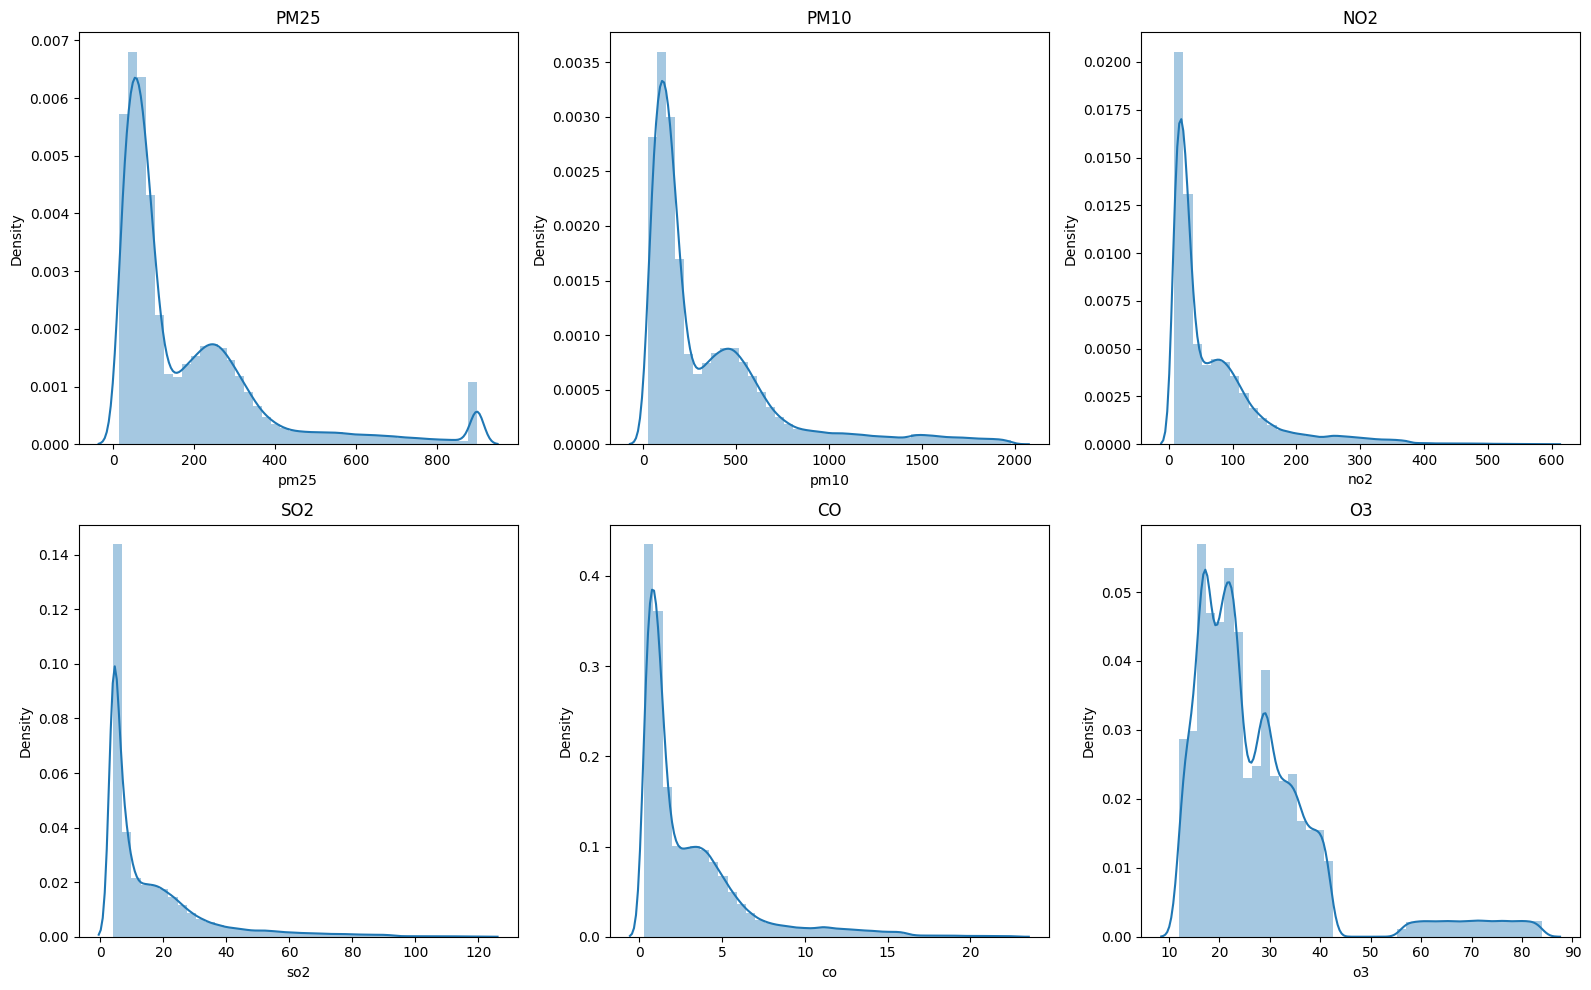

In [11]:
polluntants = ["pm25","pm10","no2","so2","co","o3"]
plt.figure(figsize=(16,10))
for i, col in enumerate(polluntants,1):
  plt.subplot(2,3,i)
  sns.distplot(dataset[col], bins = 40)
  plt.title(col.upper())
plt.tight_layout()
plt.show()
#

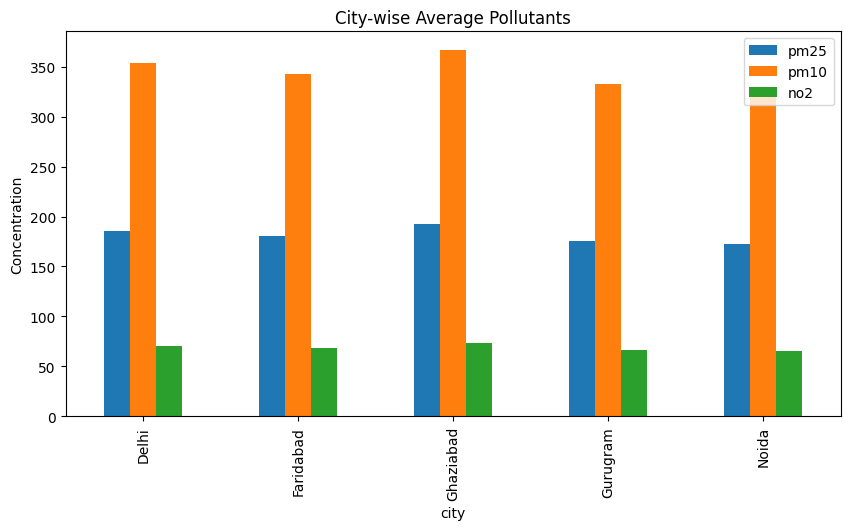

In [12]:
city_mean = dataset.groupby("city")[["pm25","pm10","no2"]].mean()

city_mean.plot(kind="bar", figsize=(10,5))
plt.title("City-wise Average Pollutants")
plt.ylabel("Concentration")
plt.show()

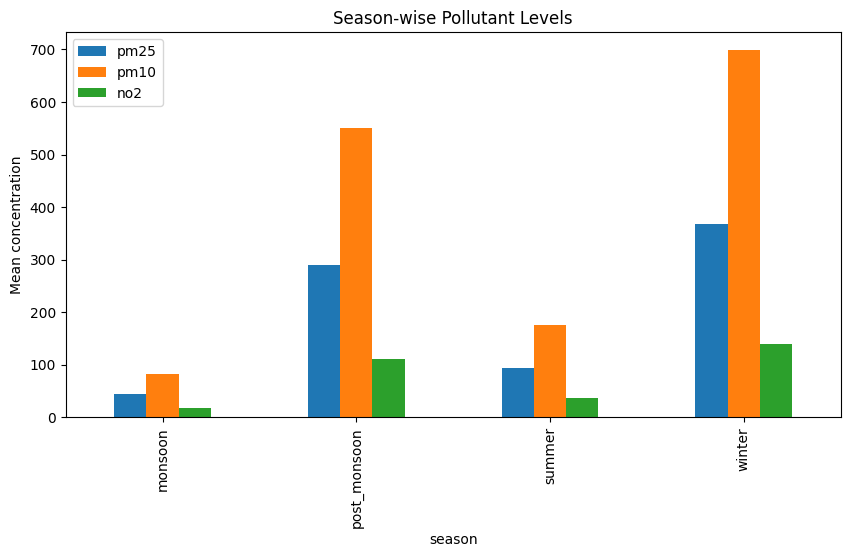

In [13]:
season_mean = dataset.groupby("season")[["pm25","pm10","no2"]].mean()

season_mean.plot(kind="bar", figsize=(10,5))
plt.title("Season-wise Pollutant Levels")
plt.ylabel("Mean concentration")
plt.show()

In [14]:
# the column pm25 to find upperfence and lowerfence
Q1 = dataset['pm25'].quantile(0.25)
Q3 = dataset['pm25'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

Q1 (25th percentile): 55.3
Q3 (75th percentile): 254.7
IQR (Interquartile Range): 199.39999999999998
Lower Fence: -243.79999999999995
Upper Fence: 553.8


In [15]:
initial_rows = len(dataset)
dataset = dataset[dataset['pm25'] <= 533]
dropped_rows = initial_rows - len(dataset)
print(f"Dropped {dropped_rows} rows where 'pm25' was greater than 533.")
print(f"New dataset shape: {dataset.shape}")

Dropped 13715 rows where 'pm25' was greater than 533.
New dataset shape: (187949, 14)


In [16]:
num_cols = [
    "pm25","pm10","no2","so2","co","o3",
    "temperature","humidity","wind_speed","visibility","aqi"
]

In [17]:
initial_rows_count = len(dataset)
pollutant_columns_to_process = ['no2', 'so2', 'co', 'o3']

for col in pollutant_columns_to_process:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5 * IQR)

    initial_column_rows = len(dataset)
    dataset = dataset[dataset[col] <= upper_fence]
    dropped_rows = initial_column_rows - len(dataset)
    print(f"Dropped {dropped_rows} rows from '{col}' where values were greater than {upper_fence}.")

print(f"Total rows in dataset after outlier removal: {len(dataset)}")

Dropped 3551 rows from 'no2' where values were greater than 176.75.
Dropped 4526 rows from 'so2' where values were greater than 37.199999999999996.
Dropped 1701 rows from 'co' where values were greater than 7.034999999999999.
Dropped 12696 rows from 'o3' where values were greater than 52.45.
Total rows in dataset after outlier removal: 165475


In [18]:
print(f"Final dataset shape after all outlier removals: {dataset.shape}")

Final dataset shape after all outlier removals: (165475, 14)


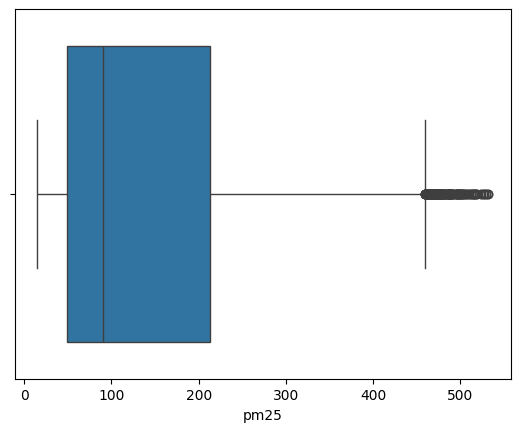

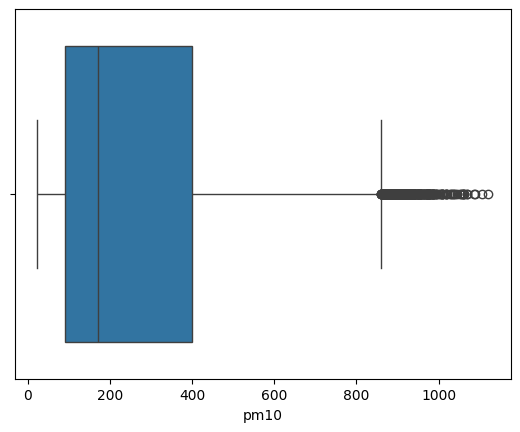

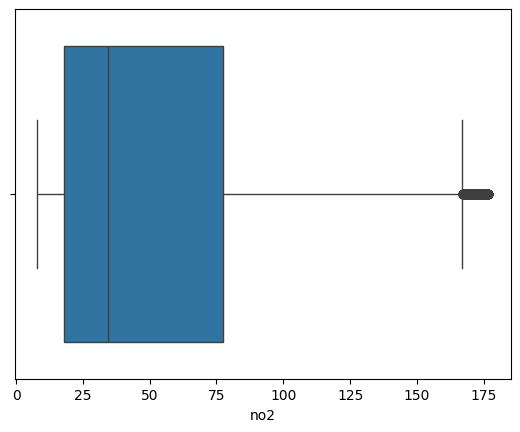

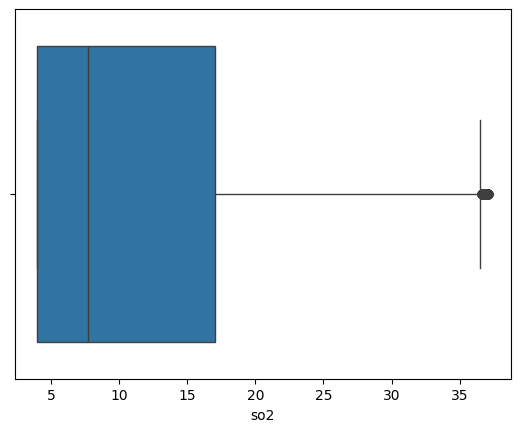

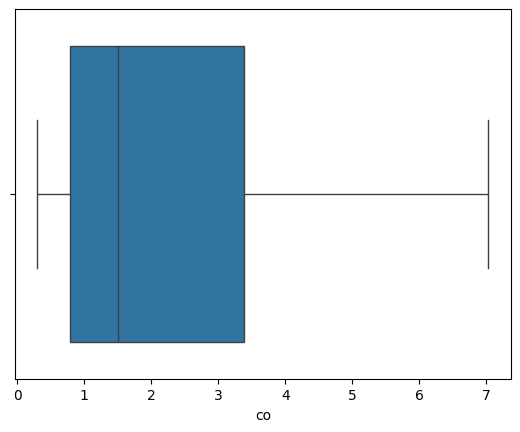

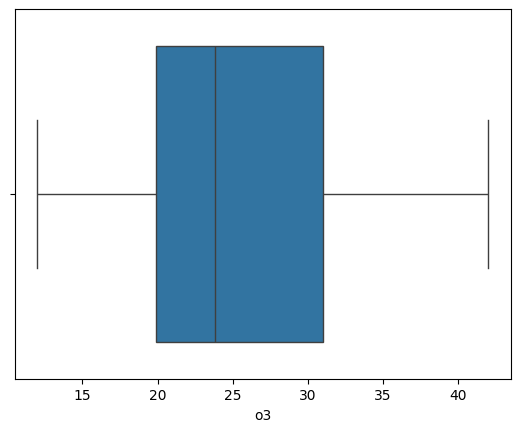

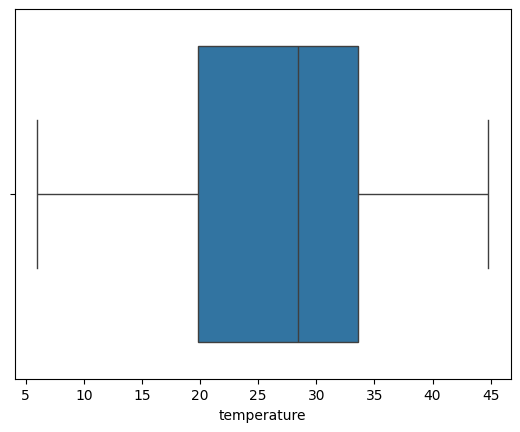

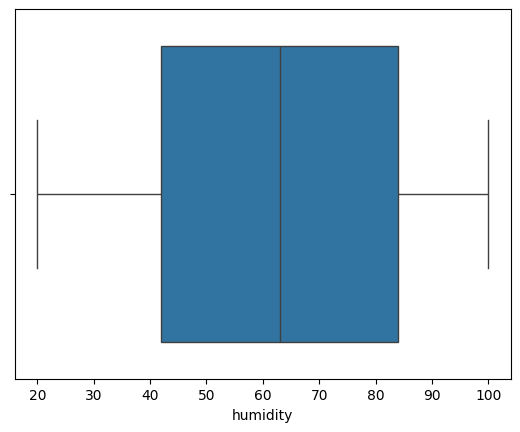

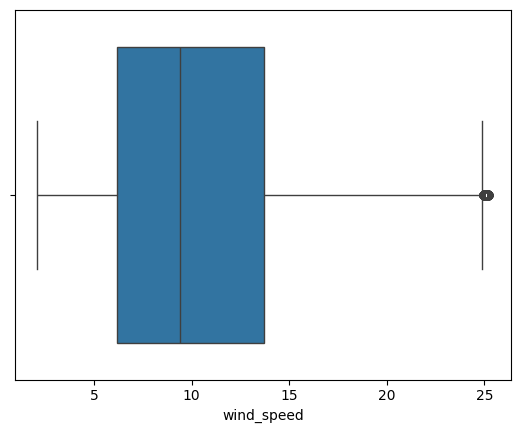

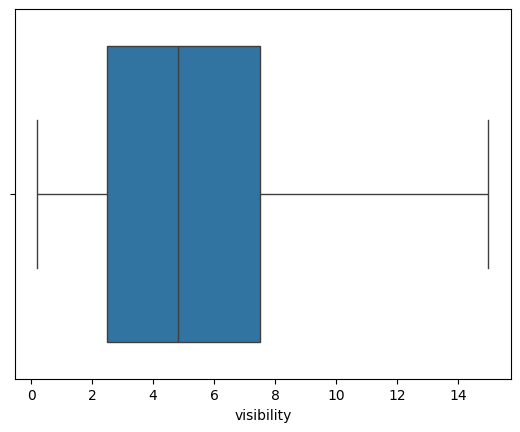

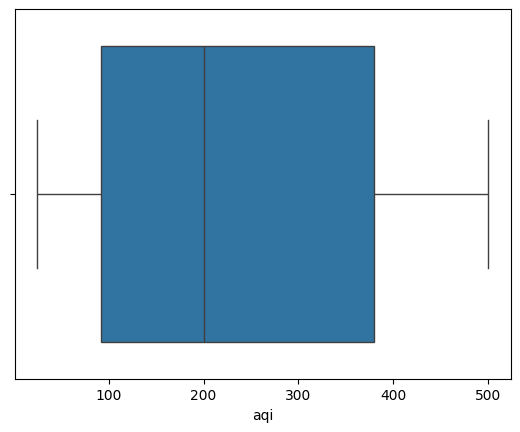

In [19]:
for col in num_cols:
  sns.boxplot(x = dataset[col])
  plt.show()

# After removing the outliers

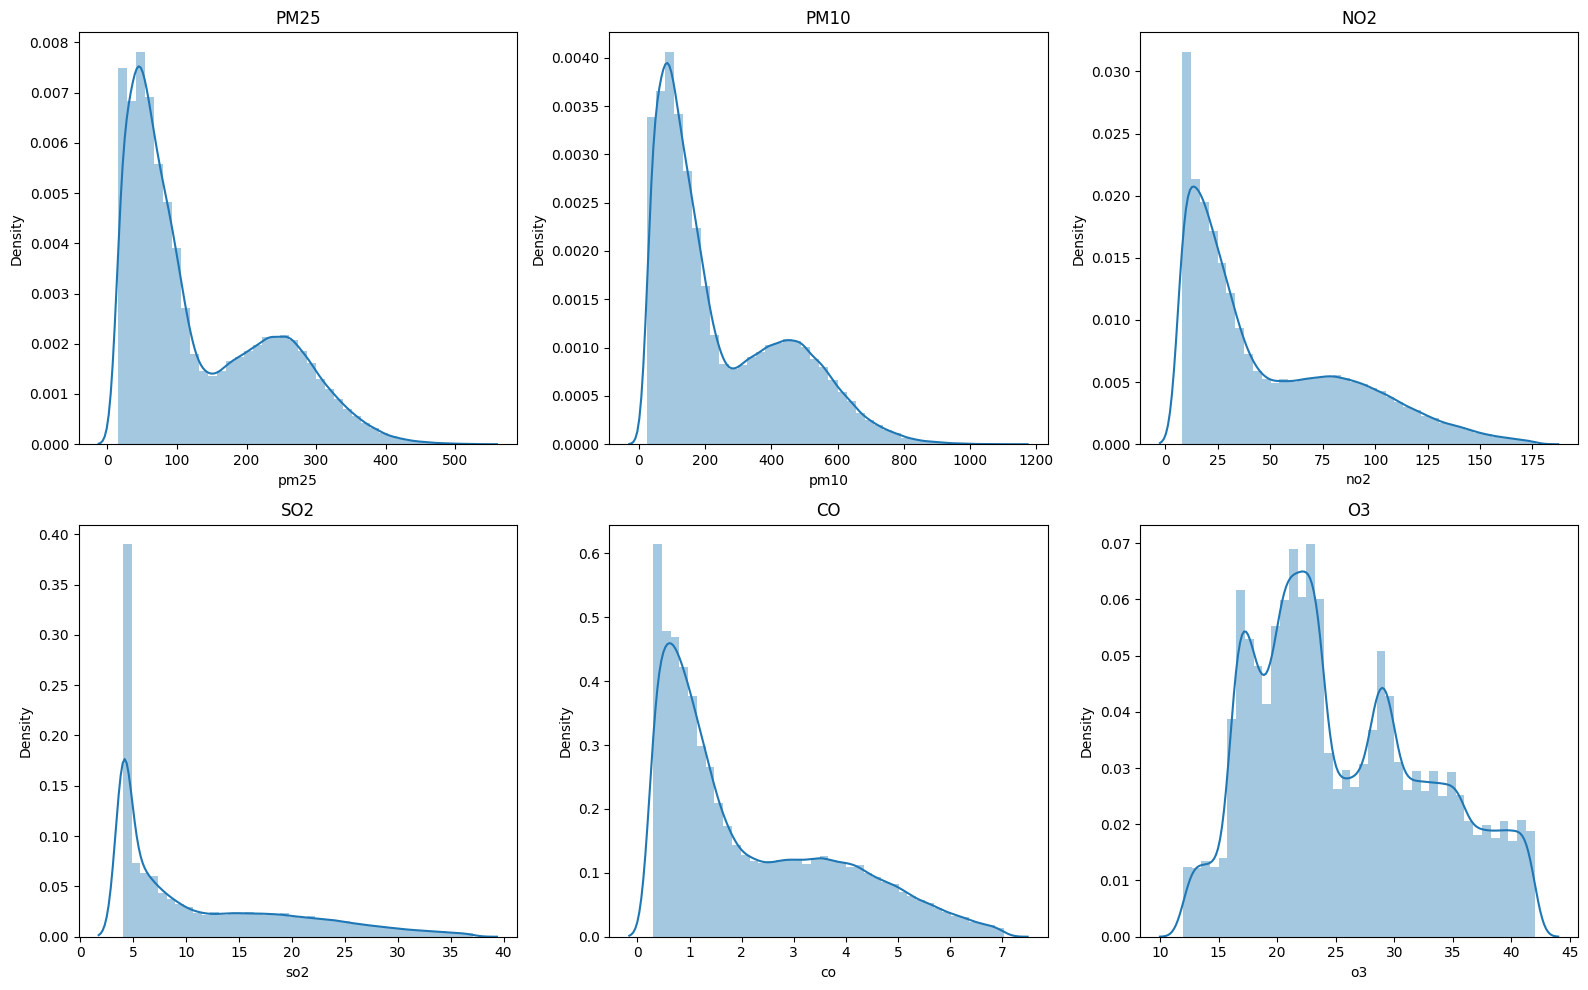

In [20]:
polluntants = ["pm25","pm10","no2","so2","co","o3"]
plt.figure(figsize=(16,10))
for i, col in enumerate(polluntants,1):
  plt.subplot(2,3,i)
  sns.distplot(dataset[col], bins = 40)
  plt.title(col.upper())
plt.tight_layout()
plt.show()

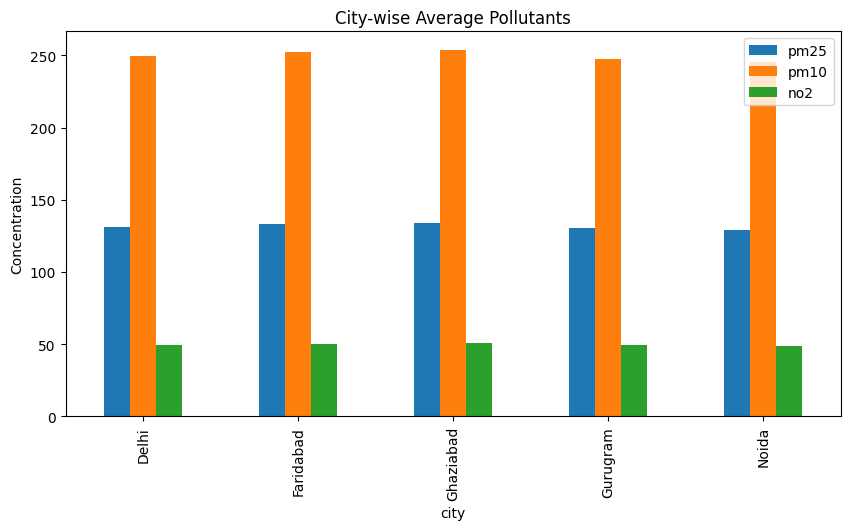

In [21]:
city_mean = dataset.groupby("city")[["pm25","pm10","no2"]].mean()

city_mean.plot(kind="bar", figsize=(10,5))
plt.title("City-wise Average Pollutants")
plt.ylabel("Concentration")
plt.show()

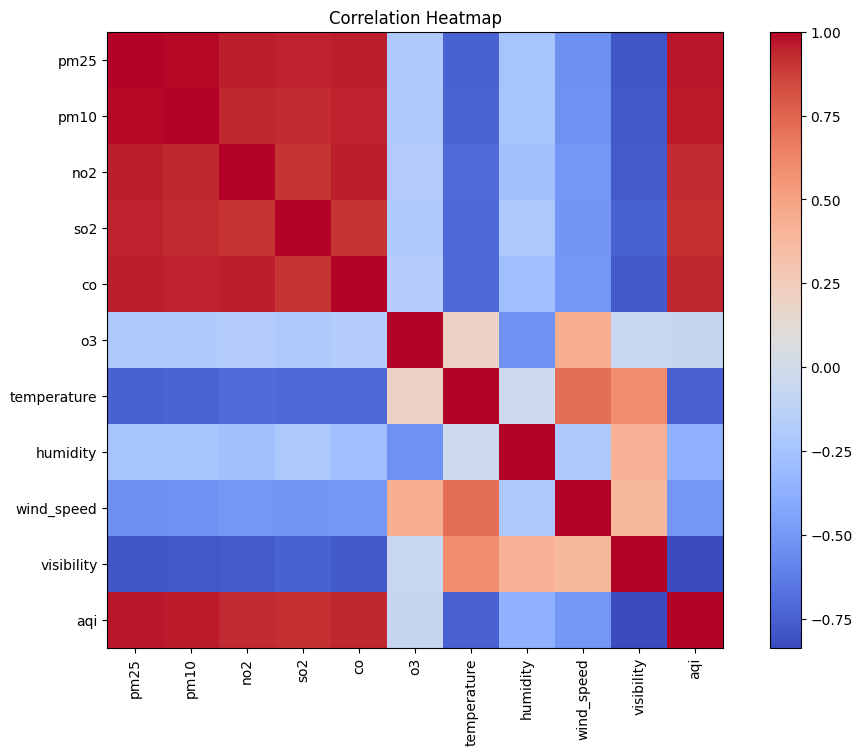

In [22]:
num_cols = [
    "pm25","pm10","no2","so2","co","o3",
    "temperature","humidity","wind_speed","visibility","aqi"
]

corr = dataset[num_cols].corr()

plt.figure(figsize=(12,8))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
dataset_copy = dataset.copy()

In [24]:
dataset_copy.head()

,year,season,city,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi
3,2020,winter,Delhi,403.8,841.8,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500
5,2020,winter,Delhi,233.4,426.8,72.2,30.4,3.99,24.6,20.0,64,9.9,2.1,396
9,2020,winter,Delhi,311.9,559.1,114.4,26.7,4.06,12.6,17.4,56,7.3,1.2,500
11,2020,winter,Delhi,336.3,625.1,115.0,30.0,6.02,15.9,12.9,47,6.4,1.0,500
12,2020,winter,Delhi,324.5,590.2,111.6,29.4,5.79,17.1,6.2,100,2.5,1.1,500


In [25]:
dataset_copy.shape

(165475, 14)

In [26]:
cat_cols = ["city", "season"]

dataset_copy = pd.get_dummies(dataset_copy, columns=cat_cols, drop_first=True)

In [27]:
dataset_copy.head()

,year,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,city_Faridabad,city_Ghaziabad,city_Gurugram,city_Noida,season_post_monsoon,season_summer,season_winter
3,2020,403.8,841.8,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,False,False,False,False,False,False,True
5,2020,233.4,426.8,72.2,30.4,3.99,24.6,20.0,64,9.9,2.1,396,False,False,False,False,False,False,True
9,2020,311.9,559.1,114.4,26.7,4.06,12.6,17.4,56,7.3,1.2,500,False,False,False,False,False,False,True
11,2020,336.3,625.1,115.0,30.0,6.02,15.9,12.9,47,6.4,1.0,500,False,False,False,False,False,False,True
12,2020,324.5,590.2,111.6,29.4,5.79,17.1,6.2,100,2.5,1.1,500,False,False,False,False,False,False,True


In [28]:
# to change the False and True in dataset

cate_col = dataset_copy.select_dtypes(include="bool").columns

for col in cate_col:
  dataset_copy[col] = dataset_copy[col].astype(int)
#

In [29]:
dataset_copy.head()

,year,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,city_Faridabad,city_Ghaziabad,city_Gurugram,city_Noida,season_post_monsoon,season_summer,season_winter
3,2020,403.8,841.8,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,0,0,0,0,0,0,1
5,2020,233.4,426.8,72.2,30.4,3.99,24.6,20.0,64,9.9,2.1,396,0,0,0,0,0,0,1
9,2020,311.9,559.1,114.4,26.7,4.06,12.6,17.4,56,7.3,1.2,500,0,0,0,0,0,0,1
11,2020,336.3,625.1,115.0,30.0,6.02,15.9,12.9,47,6.4,1.0,500,0,0,0,0,0,0,1
12,2020,324.5,590.2,111.6,29.4,5.79,17.1,6.2,100,2.5,1.1,500,0,0,0,0,0,0,1


In [30]:
dataset_copy.shape

(165475, 19)

In [31]:
X = dataset_copy.drop("aqi", axis=1)
y = dataset_copy["aqi"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [34]:
y_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.003054237800271816
MSE: 0.0011967396887747341
RMSE: 0.03459392560515118
R² Score: 0.9999999547003117


In [36]:

import joblib

# Features ka list (same order jo tumne training me use kiya tha)
columns = X.columns.tolist()
joblib.dump(columns, "columns.pkl")

['columns.pkl']

In [37]:

# RandomForest
joblib.dump(rf, "rf.pkl")

['rf.pkl']